In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


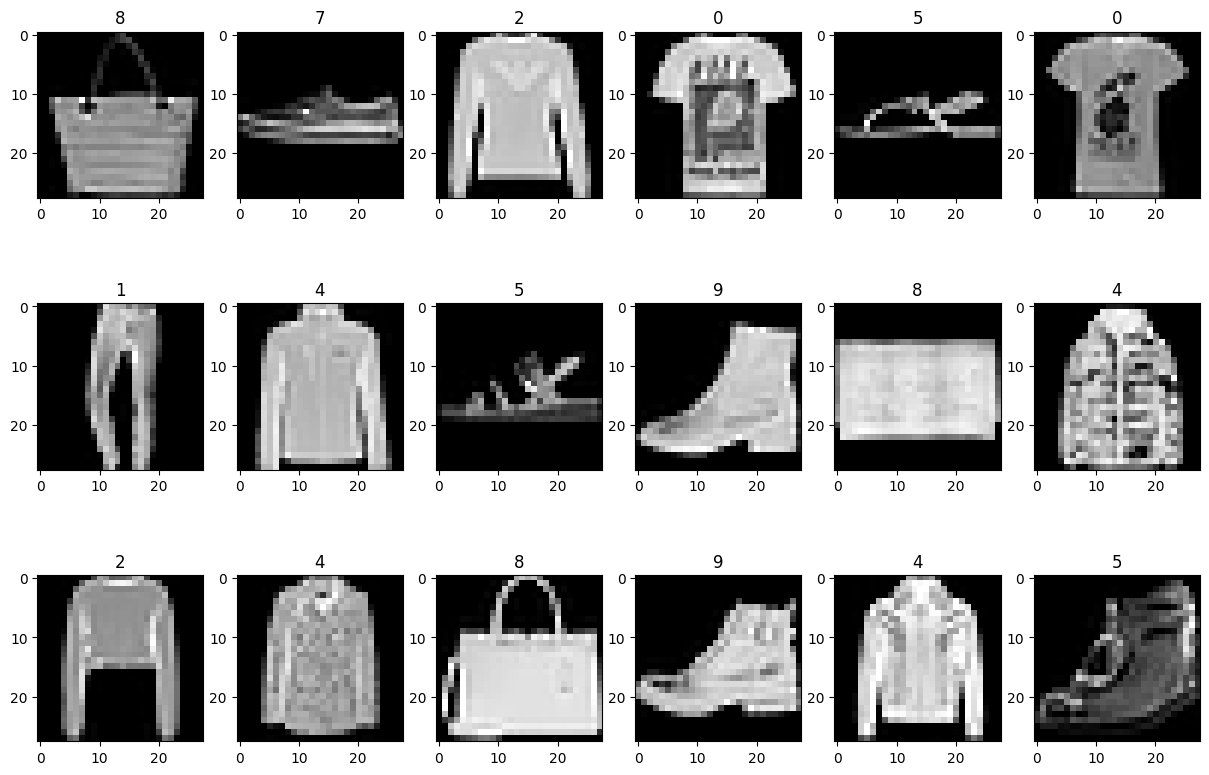

In [5]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

In [6]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [7]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 97s 103ms/step - loss: 0.3917 - accuracy: 0.8648 - val_loss: 0.3215 - val_accuracy: 0.8840
Epoch 2/50
938/938 [==============================] - 86s 92ms/step - loss: 0.2640 - accuracy: 0.9062 - val_loss: 0.2931 - val_accuracy: 0.8944
Epoch 3/50
938/938 [==============================] - 83s 89ms/step - loss: 0.2247 - accuracy: 0.9179 - val_loss: 0.3033 - val_accuracy: 0.8948
Epoch 4/50
938/938 [==============================] - 87s 92ms/step - loss: 0.1946 - accuracy: 0.9289 - val_loss: 0.3042 - val_accuracy: 0.8962
Epoch 5/50
938/938 [==============================] - 81s 86ms/step - loss: 0.1744 - accuracy: 0.9369 - val_loss: 0.3123 - val_accuracy: 0.8985
Epoch 6/50
938/938 [==============================] - 84s 90ms/step - loss: 0.1557 - accuracy: 0.9436 - val_loss: 0.3126 - val_accuracy: 0.9005
Epoch 7/50
938/938 [==============================] - 79s 84ms/step - loss: 0.1391 - accuracy: 0.9492 - val_loss: 0.3252 - val_accuracy

Train Acc      0.995116651058197
Validation Acc 0.8863000273704529


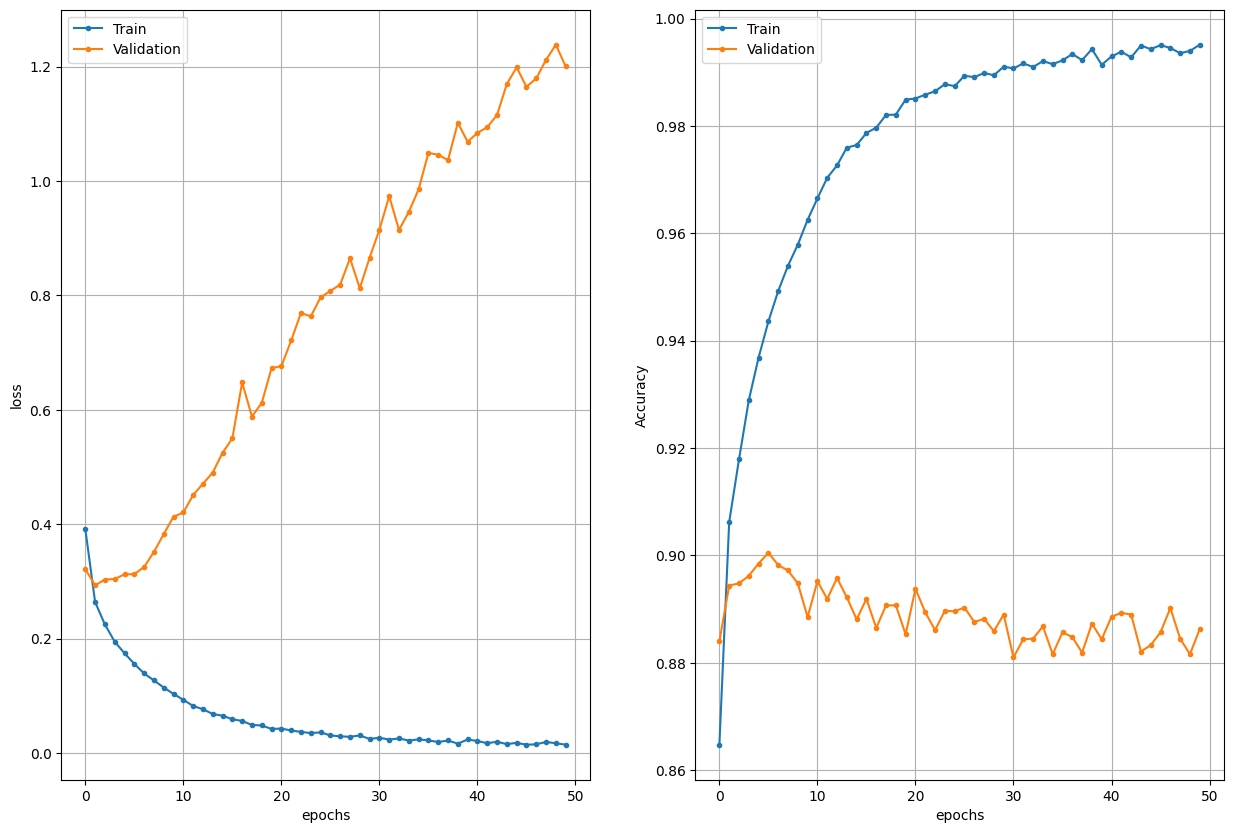

In [9]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)